<a href="https://colab.research.google.com/github/tak595/Math-Refresher/blob/main/Tak_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import multiprocessing
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#library for processing objects structured like emails
import email
from sklearn.preprocessing import LabelEncoder

In [99]:
df = pd.read_csv("/content/final_proj_data.csv")


In [100]:
# view first 5 rows of the dataset
df.head()

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,notes inbox,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,sent items,"Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,26-10-2001 16:11:01,Solicitation Calls,deleted items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam
3,5,6,kean-s/all_documents/8725.,Message-ID: <26049018.1075849864342.JavaMail.e...,19-07-2001 05:59:00,"RED Index shows Texas, NY, and Maine advance o...",all documents,Steven J Kean,Elizabeth Linnell,---------------------- Forwarded by Steven J K...,kean-s,Not Spam
4,6,7,guzman-m/discussion_threads/1650.,Message-ID: <1245690.1075840682657.JavaMail.ev...,20-04-2001 05:42:00,Start Date: 4/20/01; HourAhead hour: 13; <COD...,discussion threads,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,Start Date: 4/20/01; HourAhead hour: 13; No a...,guzman-m,Not Spam


In [101]:
# get shape of the data
df.shape

(94592, 12)

In [102]:
# a sample email
print(df.loc[1]['message'])

Message-ID: <6768695.1075852893849.JavaMail.evans@thyme>
Date: Tue, 14 Aug 2001 07:56:51 -0700 (PDT)
From: kimberly.watson@enron.com
To: pallavi.goradia@enron.com
Subject: FW: Video Conference Room
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS/CN=KWATSON>
X-To: Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Pgoradi>
X-cc: 
X-bcc: 
X-Folder: \KWATSON (Non-Privileged)\Watson, Kimberly\Sent Items
X-Origin: Watson-K
X-FileName: KWATSON (Non-Privileged).pst

Palu,
 
Are we getting a portion of the 49C2 conference video?  We are getting something from one of the video rooms.  any ideas?
 
Thanks, Kim.
-----Original Message-----
From: Robertson, Audrey 
Sent: Tuesday, August 14, 2001 9:41 AM
To: Watson, Kimberly
Cc: Harris, Steven
Subject: FW: Video Conference Room


    FYI,
 
 -----Original Message-----
From: Jones, Dana 
Sent: Tuesday, August 14, 2001 9:40 AM
To: Robertson, Audrey
Cc: G

In [103]:
# transform the email into correct format
message = df.loc[1]['message']
#uses the new library 'email'
e = email.message_from_string(message)

e.items()

[('Message-ID', '<6768695.1075852893849.JavaMail.evans@thyme>'),
 ('Date', 'Tue, 14 Aug 2001 07:56:51 -0700 (PDT)'),
 ('From', 'kimberly.watson@enron.com'),
 ('To', 'pallavi.goradia@enron.com'),
 ('Subject', 'FW: Video Conference Room'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS/CN=KWATSON>'),
 ('X-To', 'Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Pgoradi>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\KWATSON (Non-Privileged)\\Watson, Kimberly\\Sent Items'),
 ('X-Origin', 'Watson-K'),
 ('X-FileName', 'KWATSON (Non-Privileged).pst')]

In [104]:
# get date
e.get('Date')

'Tue, 14 Aug 2001 07:56:51 -0700 (PDT)'

In [105]:
# show message body
e.get_payload()

"Palu,\r\n \r\nAre we getting a portion of the 49C2 conference video?  We are getting something from one of the video rooms.  any ideas?\r\n \r\nThanks, Kim.\r\n-----Original Message-----\r\nFrom: Robertson, Audrey \r\nSent: Tuesday, August 14, 2001 9:41 AM\r\nTo: Watson, Kimberly\r\nCc: Harris, Steven\r\nSubject: FW: Video Conference Room\r\n\r\n\r\n    FYI,\r\n \r\n -----Original Message-----\r\nFrom: Jones, Dana \r\nSent: Tuesday, August 14, 2001 9:40 AM\r\nTo: Robertson, Audrey\r\nCc: Gilbert, Steve\r\nSubject: RE: Video Conference Room\r\n\r\n\r\nAudrey,  No Steve Harris's cost center is not currently charged for use of the video conference.  We are however currently assessing allocating some portion of the cost to the various users.\r\n \r\nDana\r\n \r\n\r\n-----Original Message-----\r\nFrom: Robertson, Audrey \r\nSent: Tuesday, August 14, 2001 7:55 AM\r\nTo: Jones, Dana\r\nCc: Cappiello, Deborah; Watson, Kimberly\r\nSubject: FW: Video Conference Room\r\n\r\n\r\nDana, would you b

In [106]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [107]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [108]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [109]:
df['file'][:10]

0       shackleton-s/notes_inbox/2286.
1             watson-k/sent_items/146.
2        causholli-m/deleted_items/15.
3           kean-s/all_documents/8725.
4    guzman-m/discussion_threads/1650.
5         quigley-d/deleted_items/112.
6              keavey-p/_sent_mail/19.
7     symes-k/discussion_threads/2764.
8     dorland-c/discussion_threads/31.
9         jones-t/all_documents/10869.
Name: file, dtype: object

In [110]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,"Mon, 7 May 2001 02:37:00 -0700 (PDT)",(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,"Tue, 14 Aug 2001 07:56:51 -0700 (PDT)",FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam
2,4,5,causholli-m/deleted_items/15.,Message-ID: <4383187.1075853152536.JavaMail.ev...,"Fri, 26 Oct 2001 16:11:01 -0700 (PDT)",Solicitation Calls,\MCAUSHOL (Non-Privileged)\Deleted Items,"Office of the Chairman, </O=ENRON/OU=NA/CN=REC...",All Enron Worldwide@ENRON,"Trade press, recruiting firms and others recen...",causholli-m,Not Spam


In [111]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  94592
number of unique folders:  3682


In [112]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,1225
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,1109
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,1003
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,992
4,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,979
5,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,914
6,\Kay_Mann_June2001_3\Notes Folders\Sent,882
7,\Kay_Mann_June2001_4\Notes Folders\'sent mail,818
8,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,815
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,794


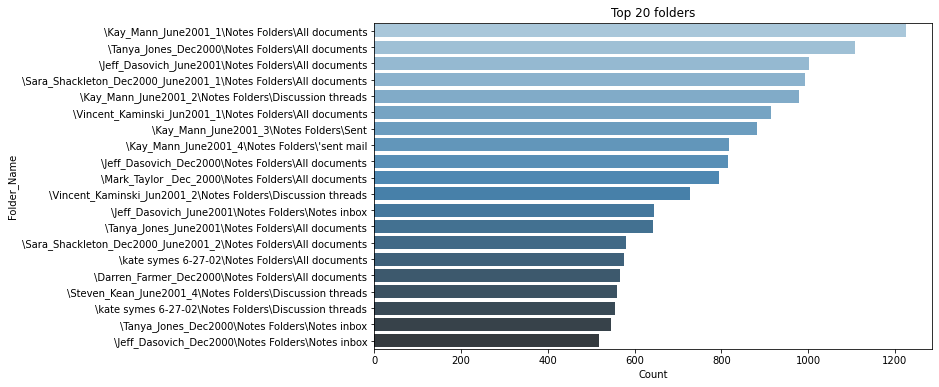

In [113]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

In [114]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,kaminski-v,5152
1,dasovich-j,5032
2,kean-s,4528
3,mann-k,4494
4,jones-t,3778
5,shackleton-s,3607
6,taylor-m,2591
7,farmer-d,2483
8,germany-c,2305
9,beck-s,2217


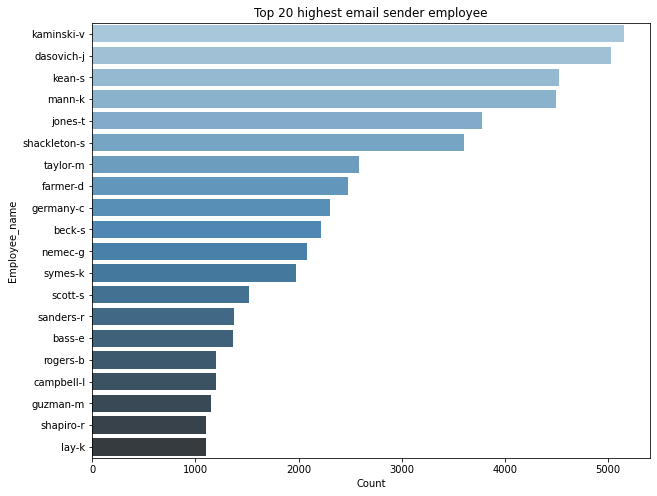

In [115]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [116]:
import datetime
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [117]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,"\KWATSON (Non-Privileged)\Watson, Kimberly\Sen...","Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam


In [118]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Notes inbox


'Notes inbox'

In [119]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,Unnamed: 0,Unnamed,file,message,date,subject,X-Folder,X-From,X-To,body,employee,label
0,1,2,shackleton-s/notes_inbox/2286.,Message-ID: <12206143.1075844795936.JavaMail.e...,07-05-2001 02:37:00,(01-149) Silver and Gold Options Expiration Op...,notes inbox,exchangeinfo@nymex.com,sara.shackleton@enron.com,"Notice No. 01-149\r\nMay 7, 2001\r\n\r\nTO:\r\...",shackleton-s,Not Spam
1,3,4,watson-k/sent_items/146.,Message-ID: <6768695.1075852893849.JavaMail.ev...,14-08-2001 07:56:51,FW: Video Conference Room,sent items,"Watson, Kimberly </O=ENRON/OU=NA/CN=RECIPIENTS...","Goradia, Pallavi </O=ENRON/OU=NA/CN=RECIPIENTS...","Palu,\r\n \r\nAre we getting a portion of the ...",watson-k,Not Spam


In [120]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  1202


array(['notes inbox', 'sent items', 'deleted items', 'all documents',
       'discussion threads', "'sent mail", 'sent', 'alaska gas', 'inbox',
       'shopping', 'miscellaneous', 'wilson, shona', 'calendar',
       'old messages', 'move', 'corp info_announcements', 'untitled',
       'eesirenewableenergy', 'new york', 'brazos'], dtype=object)

In [121]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [122]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [123]:
df.isnull().sum()

Unnamed: 0    0
Unnamed       0
file          0
message       0
date          0
subject       0
X-Folder      0
X-From        0
X-To          0
body          0
employee      0
label         0
dtype: int64

In [124]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

Series([], dtype: float64)

In [125]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [126]:
df.isnull().sum(), df.shape

(Unnamed: 0    0
 Unnamed       0
 file          0
 message       0
 date          0
 subject       0
 X-Folder      0
 X-From        0
 X-To          0
 body          0
 employee      0
 label         0
 dtype: int64, (94592, 12))

In [127]:
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

target = df['label']

myLabelEncoder = LabelEncoder()
insert = df.drop('label', axis='columns')

for i in insert:
  insert[i] = myLabelEncoder.fit_transform(insert[i])

(1000, 2) (1000,)
Counter({0: 740, 2: 104, 1: 100, 3: 56})
[ 1.90504743 -0.33111102] 1
[-0.75609407 -1.56518228] 0
[ 0.98277596 -1.59111159] 0
[-1.03203853 -0.80116218] 0
[ 1.29162949 -1.87438044] 1
[-1.39332564 -0.90457212] 0
[-0.94288986 -3.38082681] 0
[ 0.46286924 -1.04977032] 0
[-1.94125342  0.22673098] 0
[-0.44647163 -0.22528985] 0


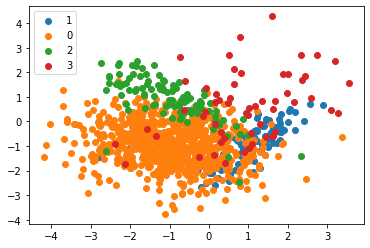

The first KMeans Accuracy:
 count    99.000000
mean      0.404091
std       0.132798
min       0.225000
25%       0.282500
50%       0.335000
75%       0.542500
max       0.620000
dtype: float64 

The first Tree Accuracy:
 count    99.000000
mean      0.828384
std       0.021616
min       0.770000
25%       0.815000
50%       0.830000
75%       0.840000
max       0.885000
dtype: float64
The first Tree Depths:
 count    99.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
dtype: float64
The first Tree Depths:
 count    99.000000
mean      7.969697
std       0.172292
min       7.000000
25%       8.000000
50%       8.000000
75%       8.000000
max       8.000000
dtype: float64
The second KMeans Accuracy:
 count    99.000000
mean      0.420404
std       0.135407
min       0.225000
25%       0.290000
50%       0.500000
75%       0.545000
max       0.625000
dtype: float64 

The second Tree Accuracy:
 count    99.000000
mean      0.833838
std  

In [128]:
#Classification Part

#example of multi-class classification task
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd

# define dataset
#X, y = make_blobs(n_samples=1000, centers=2)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=4, n_clusters_per_class=1, weights=[0.75,0.10,0.10,0.05], random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
 
 # plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

kmeans_scores = [None]*100
tree_scores = [None]*100
depth_of_tree = [None]*100
leaves_of_tree = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)

	y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	kmeans_scores[i] = accuracy_score(y_pred, Y_test)
	tree_scores[i] = clf.score(X_test, Y_test)
	depth_of_tree[i] = clf.get_depth()
	leaves_of_tree[i] = clf.get_n_leaves()

print("The first KMeans Accuracy:\n", pd.Series(kmeans_scores).describe(), "\n")
print("The first Tree Accuracy:\n", pd.Series(tree_scores).describe())
print("The first Tree Depths:\n", pd.Series(depth_of_tree).describe())
print("The first Tree Depths:\n", pd.Series(leaves_of_tree).describe())

kmeans_scores_two = [None]*100
tree_scores_two = [None]*100
depth_of_tree_two = [None]*100
leaves_of_tree_two = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=4).fit(X_train, Y_train)

	y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	kmeans_scores_two[i] = accuracy_score(y_pred, Y_test)
	tree_scores_two[i] = clf.score(X_test, Y_test)
	depth_of_tree_two[i] = clf.get_depth()
	leaves_of_tree_two[i] = clf.get_n_leaves()

print("The second KMeans Accuracy:\n", pd.Series(kmeans_scores_two).describe(), "\n")
print("The second Tree Accuracy:\n", pd.Series(tree_scores_two).describe())
print("The second Tree Depths:\n", pd.Series(depth_of_tree_two).describe())
print("The second Tree Depths:\n", pd.Series(leaves_of_tree_two).describe())

kmeans_scores_three = [None]*100
tree_scores_three = [None]*100
depth_of_tree_three = [None]*100
leaves_of_tree_three = [None]*100

for i in range(0,99):
	#Implement train_test_split
	X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)

	#code for  k means cluster analysis with sklearn
	km = KMeans(n_clusters=2).fit(X_train)
 
	#code for Decision tree classifier
	clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)

	y_pred = km.predict(X_test)
	y_tree_pred = clf.predict(X_test)
	kmeans_scores_three[i] = accuracy_score(y_pred, Y_test)
	tree_scores_three[i] = clf.score(X_test, Y_test)
	depth_of_tree_three[i] = clf.get_depth()
	leaves_of_tree_three[i] = clf.get_n_leaves()

print("The last KMeans Accuracy:\n", pd.Series(kmeans_scores_three).describe(), "\n")
print("The last Tree Accuracy:\n", pd.Series(tree_scores_three).describe())
print("The last Tree Depths:\n", pd.Series(depth_of_tree_three).describe())
print("The last Tree Depths:\n", pd.Series(leaves_of_tree_three).describe())

(1000, 2) (1000,)
Counter({0: 889, 1: 56, 2: 55})
[1.3556274  0.74865433] 0
[-1.65499443 -1.04995314] 2
[1.35890213 1.50996123] 0
[1.75416646 1.68356344] 0
[ 1.00448198 -0.64877337] 1
[0.68691411 0.23441809] 0
[0.65456187 0.90669526] 0
[ 1.30877378 -1.84448285] 1
[-0.05938959 -0.10458888] 0
[0.66906001 0.26965506] 0


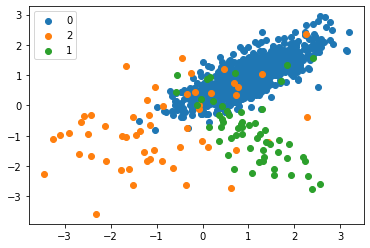

In [129]:
# example of an imbalanced binary classification task
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, weights=[0.9,0.05,0.05], random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**Use the max_depth parameter and try 3 different max depths, how does this affect your accuracy scores?**

The second and third tree accuracy is more accurate that the first one. However the second one is the most accurate out of all of them.

**Compare the following:**

*   Using all the features (should be in the aboved sections)
*   Arbitrarily pick a set of features to use, that isn't all of them, and use that set of features
is this what you mean?

**The second Tree Depths:**
 count    99.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0



*   Which set of features is the most accurate?
As we saw from the the previous answer of the first question we see that the second tree has the most accuracy compared to the other two

**The first Tree Accuracy:**
 count    99.000000
mean      0.823737
std       0.027970
min       0.760000
25%       0.805000
50%       0.825000
75%       0.842500
max       0.890000

**The second Tree Accuracy:**
 count    99.000000
mean      0.830808
std       0.025301
min       0.770000
25%       0.817500
50%       0.835000
75%       0.845000
max       0.890000

**The last Tree Accuracy:**
 count    99.000000
mean      0.826414
std       0.026371
min       0.755000
25%       0.805000
50%       0.830000
75%       0.845000
max       0.905000

The result may have changed due to running the code again.

